SDBMS Battery Simulation

Initiating PyBamm

In [46]:
import pybamm
from pybamm import BaseModel
from pprint import pprint

Choose Battery Chemical & Model

In [47]:
## [1] Doyle Fuller newman [2] Single Particle Model (SPM) [3] Single Particle Model with Electrolyte (SPMe)
availableModel = ["DFN","SPM", "SPME"]
selectedModel = availableModel[0]
model : BaseModel

match selectedModel:
    case "DFN":
        model : BaseModel = pybamm.lithium_ion.DFN()
    case "SPM":
        model : BaseModel = pybamm.lithium_ion.SPM()
    case "SPME":
        model : BaseModel = pybamm.lithium_ion.SPMe()
        


Print Available Model Input Parameter.
Input Parameter = predefined config / parameter for physical, chemical and electrochemical properties of battery.

In [48]:
modelInputParameters = list(pybamm.parameter_sets)
pprint(modelInputParameters)

['Ai2020',
 'Chayambuka2022',
 'Chen2020',
 'Chen2020_composite',
 'ECM_Example',
 'Ecker2015',
 'Ecker2015_graphite_halfcell',
 'MSMR_Example',
 'Marquis2019',
 'Mohtat2020',
 'NCA_Kim2011',
 'OKane2022',
 'OKane2022_graphite_SiOx_halfcell',
 'ORegan2022',
 'Prada2013',
 'Ramadass2004',
 'Sulzer2019',
 'Xu2019']


Display Selected Model input parameter value

In [49]:
selectedInputParameter =  pybamm.ParameterValues("Chen2020")
## DFN => Chen2020, Ai2020. SPME = Marquis2019, SPM = Marquis2019
pprint(selectedInputParameter)

{'Ambient temperature [K]': 298.15,
 'Boltzmann constant [J.K-1]': 1.380649e-23,
 'Bulk solvent concentration [mol.m-3]': 2636.0,
 'Cation transference number': 0.2594,
 'Cell cooling surface area [m2]': 0.00531,
 'Cell thermal expansion coefficient [m.K-1]': 1.1e-06,
 'Cell volume [m3]': 2.42e-05,
 'Contact resistance [Ohm]': 0,
 'Current function [A]': 5.0,
 'EC diffusivity [m2.s-1]': 2e-18,
 'EC initial concentration in electrolyte [mol.m-3]': 4541.0,
 'Electrode height [m]': 0.065,
 'Electrode width [m]': 1.58,
 'Electrolyte conductivity [S.m-1]': <function electrolyte_conductivity_Nyman2008 at 0x150d6b380>,
 'Electrolyte diffusivity [m2.s-1]': <function electrolyte_diffusivity_Nyman2008 at 0x150d6b240>,
 'Electron charge [C]': 1.602176634e-19,
 'Faraday constant [C.mol-1]': 96485.33212331001,
 'Ideal gas constant [J.K-1.mol-1]': 8.31446261815324,
 'Initial concentration in electrolyte [mol.m-3]': 1000.0,
 'Initial concentration in negative electrode [mol.m-3]': 29866.0,
 'Initial 

Print Available Model Output Parameter

In [50]:
availableOutputModelVariable = model.variable_names()
pprint(availableOutputModelVariable)

['Time [s]',
 'Time [min]',
 'Time [h]',
 'x [m]',
 'x_n [m]',
 'x_s [m]',
 'x_p [m]',
 'r_n [m]',
 'r_p [m]',
 'Current variable [A]',
 'Total current density [A.m-2]',
 'Current [A]',
 'C-rate',
 'Discharge capacity [A.h]',
 'Throughput capacity [A.h]',
 'Discharge energy [W.h]',
 'Throughput energy [W.h]',
 'Porosity',
 'Negative electrode porosity',
 'X-averaged negative electrode porosity',
 'Separator porosity',
 'X-averaged separator porosity',
 'Positive electrode porosity',
 'X-averaged positive electrode porosity',
 'Porosity change',
 'Negative electrode porosity change [s-1]',
 'X-averaged negative electrode porosity change [s-1]',
 'Separator porosity change [s-1]',
 'X-averaged separator porosity change [s-1]',
 'Positive electrode porosity change [s-1]',
 'X-averaged positive electrode porosity change [s-1]',
 'Negative electrode interface utilisation variable',
 'X-averaged negative electrode interface utilisation variable',
 'Negative electrode interface utilisation',


Available Instructions

- "Discharge at 1C for 0.5 hours",
- "Discharge at C/20 for 0.5 hours",
- "Charge at 0.5 C for 45 minutes",
- "Discharge at 1 A for 90 seconds",
- "Charge at 200mA for 45 minutes",
- "Discharge at 1 W for 0.5 hours",
- "Charge at 200 mW for 45 minutes",
- "Rest for 10 minutes",
- "Hold at 1 V for 20 seconds",
- "Charge at 1 C until 4.1V",
- "Hold at 4.1 V until 50 mA",
- #"Hold at 3V until C/50",

Run Simulation

In [63]:
experiment = pybamm.Experiment(
    [
        (
            "Discharge at C/10 for 10 hours or until 3.3 V",
            "Rest for 1 hour",
            "Charge at 1 A until 4.1 V",
            "Hold at 4.1 V until 50 mA",
            "Rest for 1 hour",
        )
    ]
)
sim = pybamm.Simulation(model, experiment=experiment, parameter_values=selectedInputParameter)
startDuration = 0
endDuration = 3600 #in second
sim.solve([startDuration, endDuration])

2025-05-18 22:18:10.598 - [WARNING] simulation.solve(556): Ignoring t_eval as solution times are specified by the experiment


Visualize

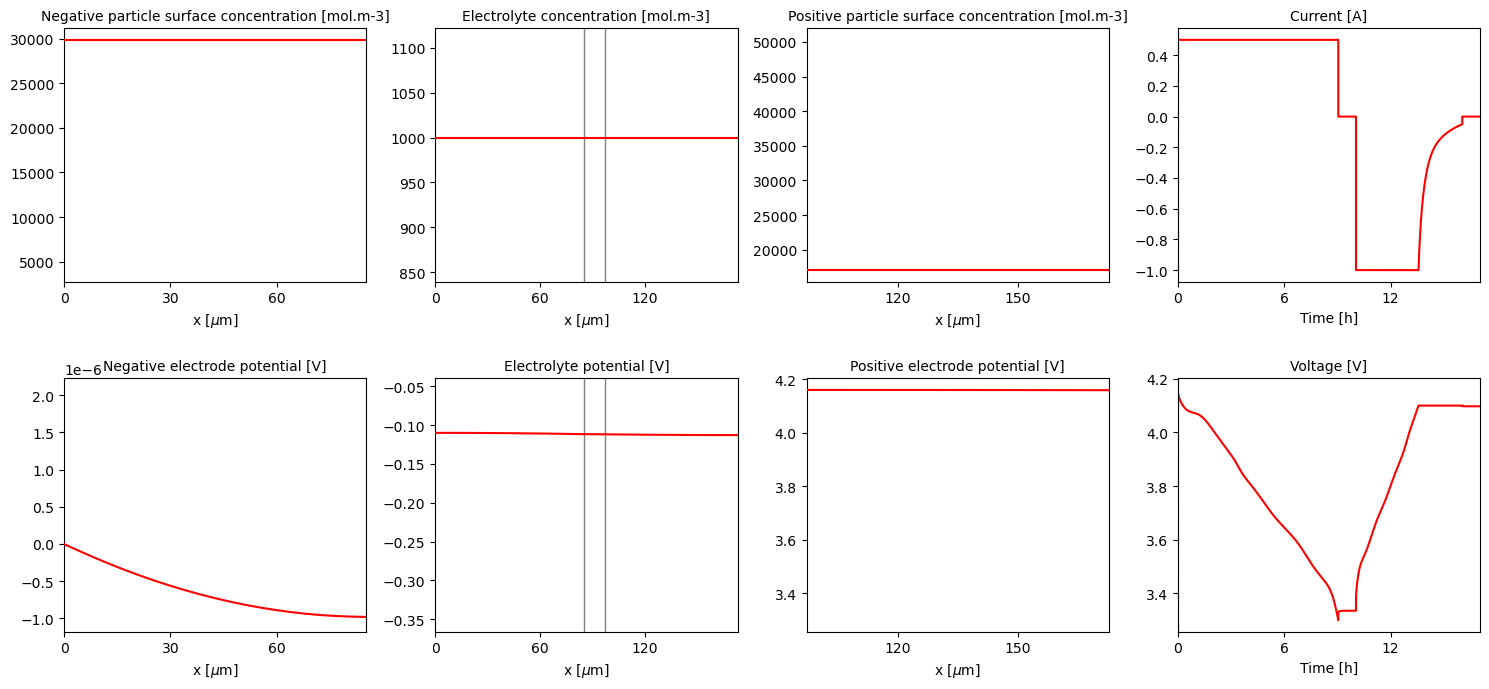

interactive(children=(FloatSlider(value=0.0, description='t', max=17.04705372017133, step=0.17047053720171332)…

In [64]:
pybamm.dynamic_plot(sim)

Export Plot to HTML (for slider feature)

Custom Plot with Selected Model Result Parameter

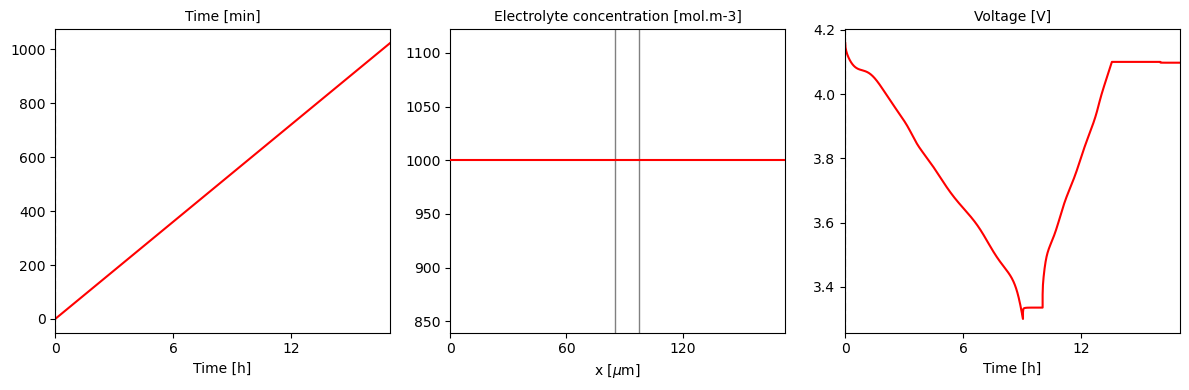

interactive(children=(FloatSlider(value=0.0, description='t', max=17.04705372017133, step=0.17047053720171332)…

In [65]:
output_variables = ["Time [min]", "Electrolyte concentration [mol.m-3]", "Voltage [V]"]
sim.plot(output_variables=output_variables)

Plot voltage component

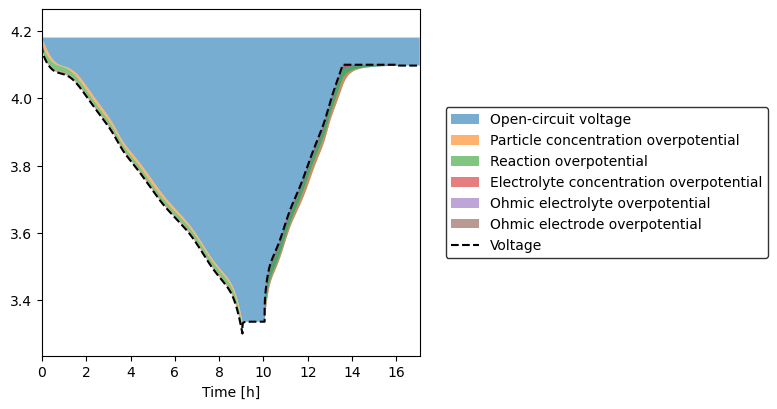

(<Figure size 800x400 with 1 Axes>, <Axes: xlabel='Time [h]'>)

In [66]:
sim.plot_voltage_components()


In [55]:
pprint("end")

'end'
